# Tarea 6
### Alumno: Marcelo Alberto Sanchez Zaragoza

In [1]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
from statsmodels.formula.api import logit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib as mpl
from matplotlib import colors
#from skelearn.model
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from my_plots import *
%matplotlib inline

ModuleNotFoundError: No module named 'my_plots'

In [2]:
import os
os.chdir('C:\\Users\\Marcelo Sanchez\\Downloads')
from digitsTaba import *

In [4]:
nmax = 60000
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_width = img_height = x_train[0].shape[0]
x_t = x_train.reshape(x_train.shape[0], img_width*img_height)
X = x_t[0:nmax,]
X = X/255
y_train = y_train[0:nmax]
num_classes = 10
### preparamos nuestros datos de prueba
#img_width = img_height = x_train[0].shape[0]
x_prueba = x_test.reshape(x_test.shape[0], img_width*img_height)
X_P = x_prueba[0:nmax,]
X_P = X_P/255

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
X.shape

(60000, 784)

In [8]:
y_train.shape

(60000,)

In [9]:
x = np.concatenate((X,X_P), axis = 0)
y = np.concatenate((y_train,y_test), axis = 0)

Buscamos una buena representación

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [11]:
#(x_train, y_train), (x_test, y_test) = mnist.load_data() #cargar los datos de mnist
X=np.concatenate((x_train, x_test), axis=0) #juntamos todos los datos
y=np.concatenate((y_train, y_test), axis=0)
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(x ,y)

LinearDiscriminantAnalysis()

In [12]:
X_train = lda.transform(x) # lda 

In [13]:
proy_1 = pd.DataFrame(X_train)
proy_1

,0,1,2,3,4,5,6,7,8
0,-0.981531,-0.606742,-1.652554,-0.208553,0.687479,3.913964,0.730961,1.786884,-0.968670
1,-3.058924,-3.052850,-2.881736,-0.090320,-3.113089,-0.510657,0.430358,-0.908838,-0.176453
2,1.857910,-0.057523,1.116243,0.246601,0.975486,-1.550479,2.048712,1.710022,2.873803
3,0.515675,4.035153,-0.033435,0.491672,-1.554729,-0.300982,-0.143532,0.567489,0.691252
4,3.234674,-1.578378,0.610038,0.349268,-1.195554,-1.478234,-0.687750,-2.008448,-1.937921
...,...,...,...,...,...,...,...,...,...
69995,-0.656725,1.714515,-0.498673,-3.703002,2.292527,-2.183754,-0.708828,0.846949,0.564614
69996,-0.706482,1.009069,-3.135860,-2.023144,1.789878,2.582620,2.330702,0.019036,0.529908
69997,3.125237,-0.844190,2.066659,1.300344,1.179797,-0.452949,-0.066520,0.285460,0.444469
69998,-0.929510,0.795998,-1.404949,3.245404,2.016501,1.709750,-2.097221,2.563550,0.026967


In [14]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [15]:
tabla_2 = proy_1
tabla_2['Nombre'] = y
tabla_2.columns = ['c1','c2','c3','c4','c5','c6','c7','c8','c9','Nombre']

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='c2', ylabel='c5'>

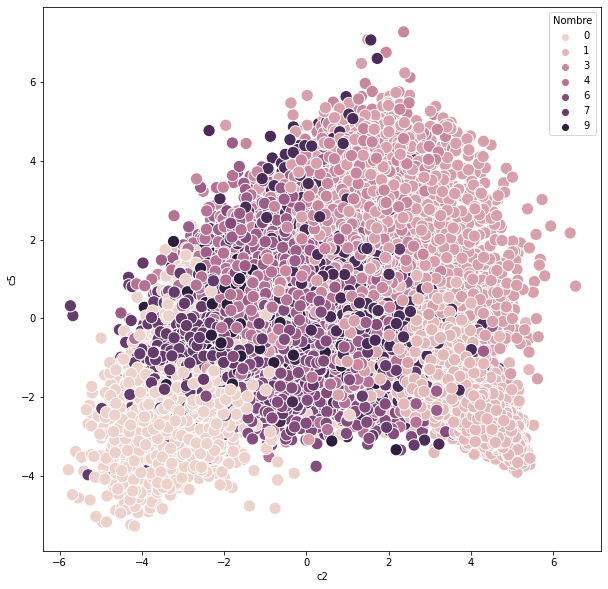

In [17]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace = 0.5)
sns.scatterplot(x='c2', y='c5', data = tabla_2, hue='Nombre', s=150, legend = 'brief')

In [18]:
X = X_train

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1, random_state=42) 

In [20]:
X_train.shape

(63000, 9)

In [21]:
X_test.shape

(7000, 9)

In [22]:
hls = [10] #[10,3]
# regularización
a = 0.1
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=hls, random_state=0, alpha=a, max_iter=500).fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [23]:
# predecir datos de prueba
y_test_hat = mlp.predict(X_test)
#y_hat = mlp.predict(X_grid)
#Z = np.reshape(y_hat,(-1,num))
#Z.shape

In [24]:
y_test_hat

array([8, 4, 8, ..., 5, 2, 6], dtype=uint8)

In [25]:
print(metrics.classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       683
           1       0.93      0.97      0.95       800
           2       0.88      0.89      0.89       674
           3       0.86      0.86      0.86       760
           4       0.91      0.91      0.91       611
           5       0.84      0.86      0.85       658
           6       0.94      0.95      0.94       677
           7       0.93      0.91      0.92       724
           8       0.85      0.81      0.83       693
           9       0.88      0.89      0.89       720

    accuracy                           0.90      7000
   macro avg       0.90      0.90      0.90      7000
weighted avg       0.90      0.90      0.90      7000



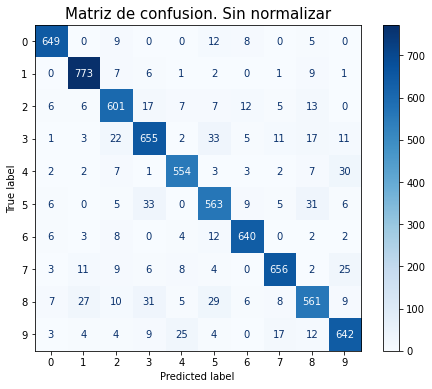

In [26]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(mlp, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV
# El grid de parámetros lo definimos como un diccionario
parameters = [
  {'hidden_layer_sizes': [10,1], 'alpha': [0.5, 0.01], 'max_iter':[500], 'solver':['lbfgs']},
]
# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator = MLPClassifier(), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid=[{'alpha': [0.5, 0.01], 'hidden_layer_sizes': [10, 1],
                          'max_iter': [500], 'solver': ['lbfgs']}],
             return_train_score=True)

In [39]:
print('Best score:', GS.best_score_)
print('..',GS.best_estimator_.hidden_layer_sizes)
print(',,', GS.best_estimator_.alpha)
#print('..', GS.best_estimator_.)

Best score: 0.9029999999999999
.. 10
,, 0.5


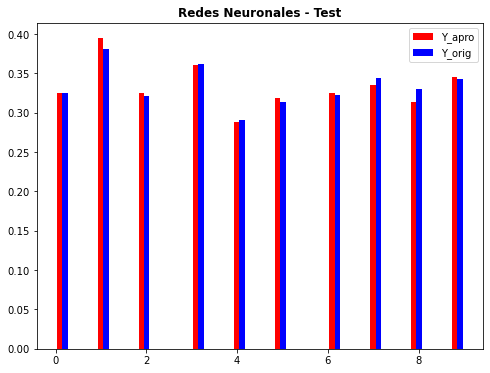

In [27]:
e_d = {'Y_apro_QDA':y_test_hat, 'Y_orig':y_test}
ed = pd.DataFrame(data=e_d)

colors = ['red', 'blue']

plt.hist(ed, 30, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('Redes Neuronales - Test',fontweight ="bold")
  
plt.show()

# Maquinas de soprte

In [28]:
from sklearn.svm import SVC # Support vector classifier

In [29]:
clf = SVC(kernel='rbf', C=2.5)
clf.fit(X_train, y_train)

SVC(C=2.5)

In [45]:
y_pred_hat = clf.predict(X_test)

In [46]:
print(metrics.classification_report(y_test, y_pred_hat))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       683
           1       0.95      0.97      0.96       800
           2       0.90      0.92      0.91       674
           3       0.89      0.88      0.89       760
           4       0.92      0.93      0.93       611
           5       0.88      0.89      0.88       658
           6       0.95      0.97      0.96       677
           7       0.94      0.93      0.93       724
           8       0.89      0.84      0.87       693
           9       0.91      0.90      0.91       720

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000



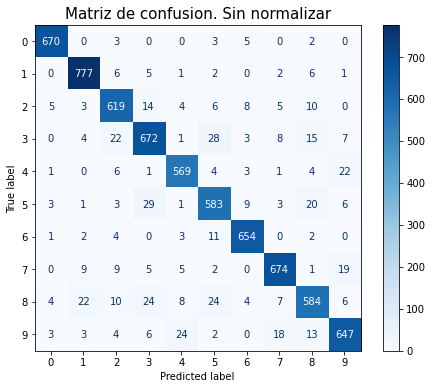

In [47]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# El grid de parámetros lo definimos como un diccionario
parameters = [
  {'kernel': ['rbf','linear'], 'C': [2.5, 0.01]},
]
# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator = SVC(), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)
print('Best score:', GS.best_score_)

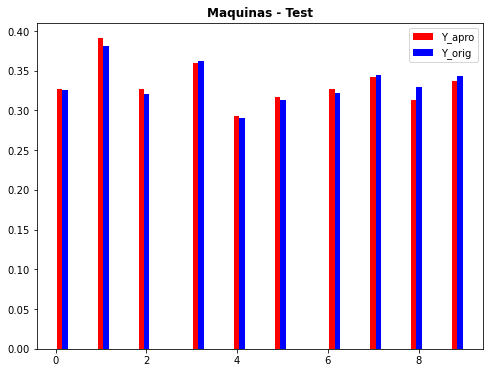

In [49]:
e_d = {'Y_apro_QDA':y_pred_hat, 'Y_orig':y_test}
ed = pd.DataFrame(data=e_d)

colors = ['red', 'blue']

plt.hist(ed, 30, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('Maquinas - Test',fontweight ="bold")
  
plt.show()

### Arboles de clasificación

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

In [31]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [32]:
#alpha_val = ccp_alphas[np.argmax(test_scores)] 
# austamos el árbol correspondiente
alpha_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0001) #0.001
alpha_tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(alpha_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(alpha_tree.score(X_test, y_test)))

Accuracy on training set: 0.901
Accuracy on test set: 0.876


In [33]:
y_pred_hat2 = alpha_tree.predict(X_test)

In [34]:
#y_pred_hat2 = alpha_tree.predict(X_test)
print(metrics.classification_report(y_test, y_pred_hat2))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       683
           1       0.92      0.95      0.94       800
           2       0.86      0.87      0.86       674
           3       0.84      0.84      0.84       760
           4       0.88      0.89      0.89       611
           5       0.81      0.80      0.81       658
           6       0.94      0.91      0.92       677
           7       0.90      0.89      0.89       724
           8       0.80      0.78      0.79       693
           9       0.87      0.87      0.87       720

    accuracy                           0.88      7000
   macro avg       0.88      0.88      0.88      7000
weighted avg       0.88      0.88      0.88      7000



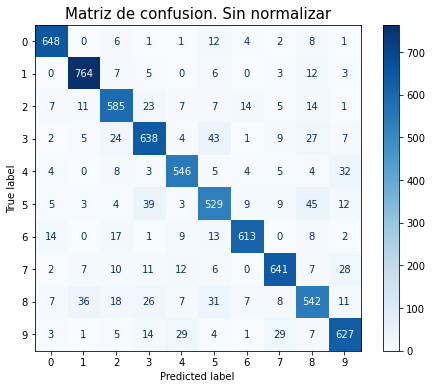

In [35]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(alpha_tree, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV
# El grid de parámetros lo definimos como un diccionario
parameters = [
  {'max_depth': [5,10,15,25], 'ccp_alpha': [0.00001, 0.001, 0.01, 0.5, 1], 'min_samples_leaf':[3,15,30]},
]
# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'ccp_alpha': [1e-05, 0.001, 0.01, 0.5, 1],
                          'max_depth': [5, 10, 15, 25],
                          'min_samples_leaf': [3, 15, 30]}],
             return_train_score=True)

In [37]:
GS.best_estimator_

DecisionTreeClassifier(ccp_alpha=1e-05, max_depth=15, min_samples_leaf=15)

In [41]:
print('Best score:', GS.best_score_) 
print('nn', GS.best_estimator_.ccp_alpha)

#print(',,', GS.best_estimator_.alpha)

Best score: 0.8746984126984128
nn 1e-05


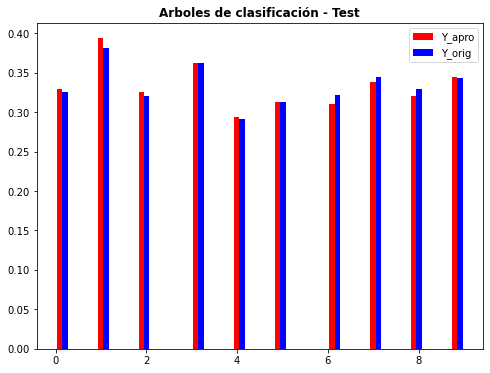

In [39]:
e_d = {'Y_apro_QDA':y_pred_hat2, 'Y_orig':y_test}
ed = pd.DataFrame(data=e_d)

colors = ['red', 'blue']

plt.hist(ed, 30, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('Arboles de clasificación - Test',fontweight ="bold")
  
plt.show()

### AdaBoost

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200,
    algorithm="SAMME.R", learning_rate=1, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=1, n_estimators=200, random_state=42)

In [49]:
y_hat = ada_clf.predict(X_test)
metrics.confusion_matrix(y_test, y_hat)

array([[633,   0,   3,   0,   1,  18,   7,   0,   5,  16],
       [  0, 720,   5,   7,   1,   2,   0,  36,  27,   2],
       [  6,  10, 576,  32,   9,  11,  15,   4,  11,   0],
       [  0,   4,  22, 607,   2,  30,   1,  11,  73,  10],
       [  1,   1,  15,   1, 557,   3,   2,   1,   7,  23],
       [  4,   2,   4,  90,   1, 479,  21,   3,  45,   9],
       [ 13,   2,  11,   0,   5,  53, 588,   0,   5,   0],
       [  1,   6,  15,   9,   7,   2,   0, 652,   5,  27],
       [  5,  24,  17,  45,   9,  30,   9,   6, 533,  15],
       [  3,   4,   7,   9,  72,   3,   0,  82,  13, 527]], dtype=int64)

In [50]:
print(metrics.classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       683
           1       0.93      0.90      0.92       800
           2       0.85      0.85      0.85       674
           3       0.76      0.80      0.78       760
           4       0.84      0.91      0.87       611
           5       0.76      0.73      0.74       658
           6       0.91      0.87      0.89       677
           7       0.82      0.90      0.86       724
           8       0.74      0.77      0.75       693
           9       0.84      0.73      0.78       720

    accuracy                           0.84      7000
   macro avg       0.84      0.84      0.84      7000
weighted avg       0.84      0.84      0.84      7000



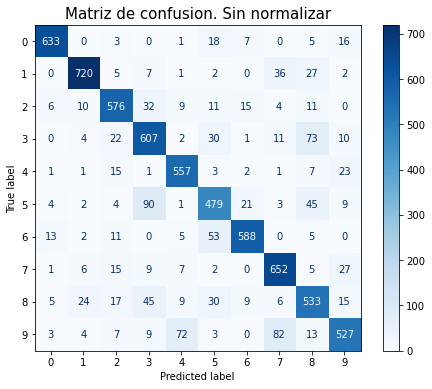

In [51]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(ada_clf, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

In [52]:
print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.856
Accuracy on test set: 0.839


In [ ]:
parameters = [
    {'base_estimator': [DecisionTreeClassifier(max_depth=4)], 'n_estimators': [200, 210, 220], 'algorithm':['SAMME.R'],
  'learning_rate':[1], 'random_state':[42,45]}
    ]
# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator = AdaBoostClassifier(), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

In [ ]:
print('Best score:', GS.best_score_) 

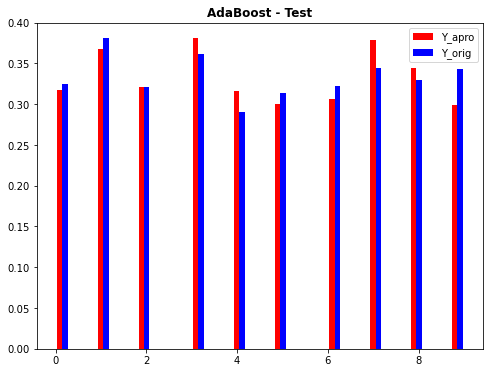

In [53]:
e_d = {'Y_apro_QDA':y_hat, 'Y_orig':y_test}
ed = pd.DataFrame(data=e_d)

colors = ['red', 'blue']

plt.hist(ed, 30, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('AdaBoost - Test',fontweight ="bold")
  
plt.show()

# Ejercicio 2

In [75]:
import pandas as pd
import matplotlib.pylab as plt 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import os
import csv
from math import sqrt
import statistics as stats
%matplotlib inline

In [76]:
import os
os.chdir('C:\\Users\\Marcelo Sanchez\\Downloads')

In [77]:
info = pd.read_csv('reviews_text_caract.csv',encoding='latin1')
info

,file,categoria,sentimiento
0,coches_no_1_11.txt,coches,no
1,coches_no_1_13.txt,coches,no
2,coches_no_1_15.txt,coches,no
3,coches_no_1_18.txt,coches,no
4,coches_no_1_19.txt,coches,no
...,...,...,...
395,peliculas_yes_5_23.txt,peliculas,yes
396,peliculas_yes_5_4.txt,peliculas,yes
397,peliculas_yes_5_5.txt,peliculas,yes
398,peliculas_yes_5_7.txt,peliculas,yes


In [96]:
y = info.iloc[:,1:]
y

,categoria,sentimiento
0,coches,no
1,coches,no
2,coches,no
3,coches,no
4,coches,no
...,...,...
395,peliculas,yes
396,peliculas,yes
397,peliculas,yes
398,peliculas,yes


In [78]:
import os
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.stem.snowball import SnowballStemmer
englishStemm=SnowballStemmer("english").stem
spanishStemm=SnowballStemmer("spanish").stem
import spacy
sp_es = spacy.load('es_core_news_sm')
sp_en = spacy.load('en_core_web_sm')

#import pattern
#from pattern.es import lemma as spanishlemma
#from pattern.en import lemma as englishlemma

nltk.download('stopwords')
from nltk.corpus import stopwords
stopEnglish=set(stopwords.words('english'))
stopSpanish=set(stopwords.words('spanish'))
#stopSpanish

def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

def listdir_fullpath(d):
    return [os.path.join(d, f) for f in sorted_alphanumeric(os.listdir(d))]


class preprocesaTexto():
    def __init__(self, idioma,_tokeniza=False,_aMinusculas=True,
                 _aMayusculas=False,_removerPuntuacion=True,_removerCaracteresRaros=True,
                 _quitarNumeros=True,_lematiza=False,_stemming=False,_quitarAcentos=False,
                 _remueveStop=False,_muestraCambios=False):
        self.idioma =idioma
        self._tokeniza=_tokeniza
        self._aMinusculas=_aMinusculas
        self._aMayusculas=_aMayusculas
        self._removerPuntuacion=_removerPuntuacion
        self._removerCaracteresRaros=_removerCaracteresRaros
        self._quitarNumeros=_quitarNumeros
        self._lematiza=_lematiza
        self._stemming=_stemming
        self._quitarAcentos =_quitarAcentos
        self._remueveStop =_remueveStop
        self._muestraCambios=_muestraCambios
    """ codigo... """ 
    def tokeniza(self,texto):
        return word_tokenize(texto)

    def aMinusculas(self,texto):
        if(self.idioma== 'es'):
            ans=""
            for c in texto:
                if c=='Á' : c='á'
                if c=='É' : c='é'
                if c=='Í' : c='í'
                if c=='Ó' : c='ó'
                if c=='Ú' : c='ú'
                if c=='Ñ' : c='ñ'
                if c=='Ü' : c='ü'
                ans+=c
            return ans.lower()
        else:
            return texto.lower()

    def aMayusculas(self,texto):
        if self.idioma == 'es':
            ans=""
            for c in texto:
                if c=='á' : c='Á'
                if c=='é' : c='É'
                if c=='í' : c='Í'
                if c=='ó' : c='Ó'
                if c=='ú' : c='Ú'
                if c=='ñ' : c='Ñ'
                if c=='ü' : c='Ü'
                ans+=c
            return 'perro'#ans.upper()
        else:
            return texto.upper()

    def quitarAcentos(self,texto):
        if self.idioma == 'es':
            ans=""
            for c in texto:
                if c=='á' : c='a'
                if c=='é' : c='e'
                if c=='í' : c='i'
                if c=='ó' : c='o'
                if c=='ú' : c='u'
                if c=='Á' : c='A'
                if c=='É' : c='E'
                if c=='Í' : c='I'
                if c=='Ó' : c='O'
                if c=='Ú' : c='U'
                ans+=c
            return ans
        else:
            return texto

    def removerPuntuacion(self,texto):
        puntuacion=string.punctuation
        if self.idioma=='es': 
            puntuacion+="¡¿"
            temp=""
            for c in texto:
                if not c in puntuacion:
                      temp+=c
        return temp

    def removerCaracteresRaros(self,texto):
        buenos=string.printable
        if self.idioma=='es': 
            buenos+="¡¿áéíóúÁÉÍÓÚÑñÜü"
            temp=""
            for c in texto:
                if c in buenos:
                    temp+=c
        return temp

    def quitarNumeros(self,texto):
        temp=""
        for c in texto:
            if not c.isdigit():
                  temp+=c
        return temp

    def lematiza(self,texto):
        temp=[]
        if self.idioma== 'es':
            doc = sp_es(texto)
            for token in doc:
                temp.append(token.lemma_)
                temp.append(" ")
        else :
            doc = sp_en(texto)
            for token in doc:
                temp.append(token.lemma_)
                temp.append(" ")
        return "".join(temp)

    def stemming(self,texto):
        palabras=word_tokenize(texto)
        temp=[]
        if self.idioma== 'es':
            for pal in palabras:
                  temp.append(spanishStemm(pal))
            temp.append(" ")
        else :
            for pal in palabras:
                  temp.append(englishStemm(pal))
            temp.append(" ")
        return "".join(temp)

    def remueveStop(self,texto):
        palabras=word_tokenize(texto)
        temp=[]
        if self.idioma== 'es':
            for pal in palabras:
                  if pal not in stopSpanish:
                    temp.append(pal)
                    temp.append(" ")
        else :
            for pal in palabras:
                  if pal not in stopEnglish:
                    temp.append(pal)
                    temp.append(" ")
        return "".join(temp)

    def preprocesa(self,texto):
        ans=texto
        if self._muestraCambios : print("Inicial:\n", ans)
        if self._removerCaracteresRaros : 
            ans=self.removerCaracteresRaros(ans)
        if self._muestraCambios : print("Quitando caracteres raros:\n", ans)
        if self._removerPuntuacion : 
            ans=self.removerPuntuacion(ans)
        if self._muestraCambios :print("Quitando signos de puntuacion:\n", ans)
        if self._quitarNumeros : 
            ans=self.quitarNumeros(ans)
        if self._muestraCambios : print("Quitando numeros:\n", ans)
        if self._aMinusculas : 
            ans=self.aMinusculas(ans)
        if self._muestraCambios : print("Convirtiendo a minusculas:\n", ans)  
        if self._aMayusculas : 
            ans=self.aMayusculas(ans)
        if self._muestraCambios : print("Convirtiendo a mayusculas:\n", ans)
        if self._remueveStop : 
            ans=self.remueveStop(ans)
        if self._muestraCambios : print("Quitando stop words:\n", ans)
        if self._quitarAcentos : 
            ans=self.quitarAcentos(ans)
        if self._muestraCambios : print("Quitando acentos:\n", ans)
        if self._lematiza : 
            ans=self.lematiza(ans)
        if self._muestraCambios : print("Lematizando:\n", ans)
        if self._stemming : 
            ans=self.stemming(ans)
        if self._muestraCambios : print("Stemming:\n", ans)
        if self._tokeniza : 
            ans=self.tokeniza(ans)
        if self._muestraCambios : print("Tokenizando:\n", ans)
        if self._muestraCambios : print("Final:\n", ans)
        return ans 

[nltk_data] Downloading package punkt to C:\Users\Marcelo
[nltk_data]     Sanchez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Marcelo
[nltk_data]     Sanchez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [80]:
preprocesador = preprocesaTexto(idioma='es', _tokeniza=False, _muestraCambios=False, _quitarAcentos=True, _quitarNumeros=True,
                                _remueveStop=True, _stemming=False, _lematiza=False, _removerPuntuacion=True)

In [81]:
os.chdir('/Users/Marcelo Sanchez/Desktop/Segundo semestre CIMAT/Ciencia de Datos/Tarea_5/all_files') # Mio
corpus_corpus=[]
s = ' '  # Aqui lo que hacemos leer todos los documento
#for i in dftrain['file']: # Los ponemos en un solo vector con las caracteristicas
for i in info['file']:  # Se utiliza todo 
    #print(i)
    corpus_prep = []
    reader = csv.reader(open(i),delimiter='.') # Leerlo
    for row in reader:
        corpus_prep.append(preprocesador.preprocesa(s.join(row))) # Unir con el procesamiento
    corpus_corpus.append(s.join(corpus_prep))

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
corpus_corpus

['compre coche utilizado actualmente agosto km solo averia embrague ptas dice seat at cliente pasado garantia hacen cargoa pesarque mecanico dijo debia mal uso parte arreglo resulta pedaluna vez arregladono sube vuelven arreglar actualmente sigue mal ujnh ruido bajos parece concierto m atrevo viajar vacaciones normal coche años km risa siasimila aceite q maravilla litros hoy ahoira llevo meses mirar deposito estara mitad calculo ganga coche mantenerlo sale precio d audi ideal gente joven gracias baphotmail com ',
 'jtd cv vi mire cuantas veces arrepentido  señales pilotos averias todas airbag abs asr esp sensor nivel aceite queda alguna  problema saben arreglarlo si señor saben sistema mierda ultima vez semana taller monto darle contactoalli pilotitos encendidos dicen deje vez semana pues coche compre viajar  seguimos selector velocidad funciona da gana montas sabes si viaje podras poner  seguimos pintura dan acuarela cagadita gorrion minutos levanta pintura vaya mierda  seguimos ah ol

In [97]:
#corpus_train, corpus_test = train_test_split(corpus_corpus, test_size=1/8, train_size=7/8, random_state=42)

#vectorizer = CountVectorizer(max_features=10000)
#X_train = vectorizer.fit_transform(corpus_train)
#X_test = vectorizer.transform(corpus_test)
#X_train = X_train.toarray()
#X_test = X_test.toarray()

#scaler = StandardScaler()
#X_train_sc = scaler.fit_transform(X_train)
#X_test_sc = scaler.transform(X_test)

y = np.array(info.iloc[:,1:])
y_train, y_test = train_test_split(y, test_size=0.2, train_size=0.8, random_state=42)

In [98]:
#######
vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,1), binary=False, max_features=10000)
#vectorizer = CountVectorizer(lowercase=True, ngram_range= (2,2), binary=False, max_features=10000)
X = vectorizer.fit_transform(corpus_corpus)
#X = vectorizer.fit_transform(corpus_corpus)
bow = X.toarray()
bow_df = pd.DataFrame(bow,columns=vectorizer.get_feature_names())
bow_df

,aaron,abajo,abandona,abandonado,abandonar,abandono,abarcan,abate,abatibles,abatir,...,zi,zona,zonas,zoom,zumbido,zumo,zumos,zwan,ñoñas,ñoño
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,frec,Frec_acum
si,884,0.010400
pelicula,488,0.016141
bien,444,0.021364
solo,410,0.026187
asi,402,0.030917
...,...,...
segmento,4,0.850829
ponga,4,0.850876
piensan,4,0.850923
piensas,4,0.850970


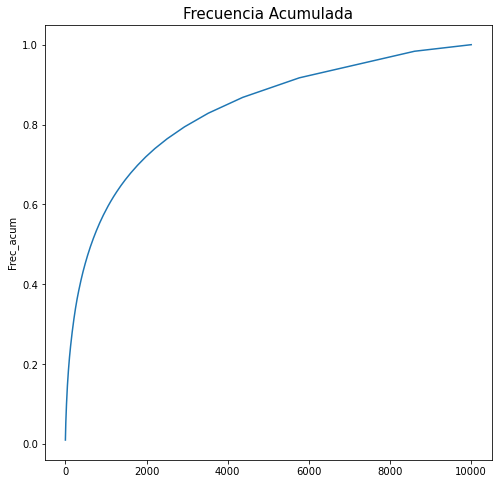

In [99]:
FF=pd.DataFrame({'frec':bow_df.sum()}) # Lo que hacemos en ver la frencuencia acumuladas
FF=FF.sort_values('frec',ascending=False) # para ver cuantas palabras son necesarias
FF['Frec_acum']=(FF['frec'].cumsum()/FF['frec'].cumsum()[-1])
plt.figure(figsize=(8, 8))
sns.lineplot(x=range(0,10000), y="Frec_acum", data=FF) # Graficamos la varianza acumulada
plt.title('Frecuencia Acumulada', fontsize=15)
FF=FF[0:4000]
FF.index.tolist()
FF

In [100]:
bow = bow_df[FF.index.tolist()]
bow

,si,pelicula,bien,solo,asi,ser,aunque,hace,mas,menos,...,secretos,darcy,dada,dandole,seguido,segmento,ponga,piensan,piensas,see
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,1,1,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,4,1,1,3,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
396,1,8,1,4,2,5,3,2,0,2,...,0,0,0,0,0,1,0,0,0,0
397,3,21,1,6,1,6,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
398,10,27,3,3,4,3,10,6,1,4,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X_train_sc, X_test_sc = train_test_split(bow, test_size=0.2, train_size=0.8, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, train_size=0.8, random_state=42)

In [92]:
y_train

array([5, 4, 8, ..., 1, 0, 0], dtype=uint8)

In [103]:
y_train_categoria = y_train[:,0]
y_train_sentimiento = y_train[:,1]


#### prueba ############
y_test_categoria = y_test[:,0]
y_test_sentimiento = y_test[:,1]

In [104]:
y_test_categoria

array(['moviles', 'musica', 'coches', 'moviles', 'hoteles', 'hoteles',
       'ordenadores', 'hoteles', 'musica', 'lavadoras', 'coches',
       'peliculas', 'hoteles', 'hoteles', 'lavadoras', 'coches', 'musica',
       'peliculas', 'moviles', 'peliculas', 'hoteles', 'coches',
       'peliculas', 'musica', 'coches', 'peliculas', 'lavadoras',
       'moviles', 'musica', 'lavadoras', 'peliculas', 'libros', 'musica',
       'hoteles', 'moviles', 'lavadoras', 'lavadoras', 'ordenadores',
       'libros', 'lavadoras', 'peliculas', 'hoteles', 'hoteles', 'coches',
       'hoteles', 'peliculas', 'lavadoras', 'libros', 'coches', 'libros',
       'coches', 'ordenadores', 'ordenadores', 'hoteles', 'peliculas',
       'coches', 'moviles', 'libros', 'coches', 'libros', 'lavadoras',
       'musica', 'musica', 'hoteles', 'lavadoras', 'coches', 'peliculas',
       'musica', 'peliculas', 'hoteles', 'ordenadores', 'lavadoras',
       'coches', 'coches', 'peliculas', 'moviles', 'moviles', 'peliculas',
    

## Redes neu

#### categoria

In [105]:
hls = [10] #[10,3]
# regularización
a = 0.5
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=hls, 
                    random_state=0, alpha=a, max_iter=500).fit(X_train_sc, y_train_categoria)

In [106]:
y_pred = mlp.predict(X_test_sc)
print(metrics.classification_report(y_test_categoria, y_pred))

              precision    recall  f1-score   support

      coches       1.00      0.85      0.92        13
     hoteles       1.00      1.00      1.00        13
   lavadoras       1.00      1.00      1.00        11
      libros       0.64      1.00      0.78         7
     moviles       0.89      1.00      0.94         8
      musica       0.91      1.00      0.95        10
 ordenadores       0.83      1.00      0.91         5
   peliculas       1.00      0.62      0.76        13

    accuracy                           0.91        80
   macro avg       0.91      0.93      0.91        80
weighted avg       0.94      0.91      0.91        80



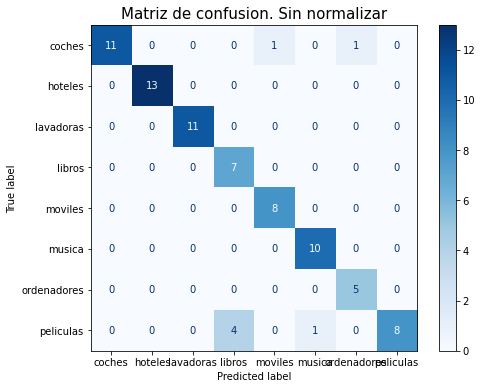

In [107]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(mlp, X_test_sc, y_test_categoria, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

In [171]:
from sklearn.model_selection import GridSearchCV
# El grid de parámetros lo definimos como un diccionario
parameters = [
  {'hidden_layer_sizes': [10,1], 'alpha': [0.5, 0.01], 'max_iter':[500], 'solver':['lbfgs']},
]
# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator = MLPClassifier(), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(X_train_sc, y_train_categoria)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid=[{'alpha': [0.5, 0.01], 'hidden_layer_sizes': [10, 1],
                          'max_iter': [500], 'solver': ['lbfgs']}],
             return_train_score=True)

In [172]:
print('Best score:', GS.best_score_)
print(GS.best_estimator_.hidden_layer_sizes)
print(GS.best_estimator_.alpha)

Best score: 0.96875


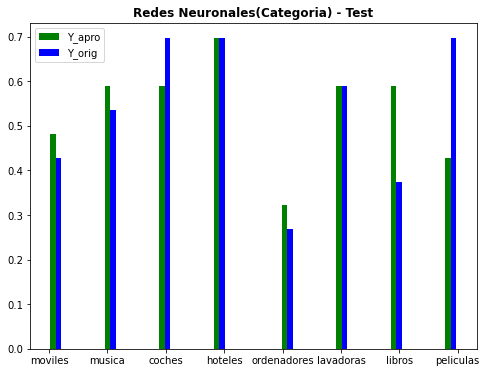

In [110]:
e_d = {'Y_apro_QDA':y_pred, 'Y_orig':y_test_categoria}
ed = pd.DataFrame(data=e_d)

colors = ['green', 'blue']

plt.hist(ed, 30, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('Redes Neuronales(Categoria) - Test',fontweight ="bold")
  
plt.show()

### Sentimiento

In [119]:
hls = [10] #[10,3]
# regularización
a = 0.01
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=hls, 
                    random_state=0, alpha=a, max_iter=500).fit(X_train_sc, y_train_sentimiento)
y_pred = mlp.predict(X_test_sc)
print(metrics.classification_report(y_test_sentimiento, y_pred))

              precision    recall  f1-score   support

          no       0.59      0.67      0.62        36
         yes       0.69      0.61      0.65        44

    accuracy                           0.64        80
   macro avg       0.64      0.64      0.64        80
weighted avg       0.64      0.64      0.64        80



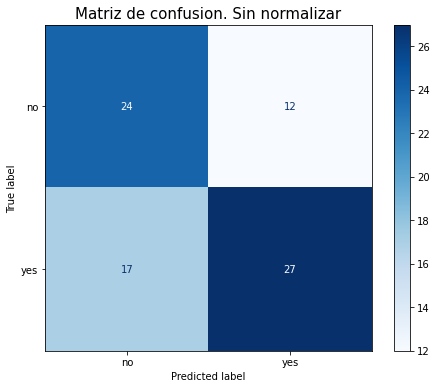

In [120]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(mlp, X_test_sc, y_test_sentimiento, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

In [115]:
from sklearn.model_selection import GridSearchCV
# El grid de parámetros lo definimos como un diccionario
parameters = [
  {'hidden_layer_sizes': [10,1], 'alpha': [0.5, 0.01], 'max_iter':[500], 'solver':['lbfgs']},
]
# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator = MLPClassifier(), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(X_train_sc, y_train_sentimiento)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid=[{'alpha': [0.5, 0.01], 'hidden_layer_sizes': [10, 1],
                          'max_iter': [500], 'solver': ['lbfgs']}],
             return_train_score=True)

In [116]:
print('Best score:', GS.best_score_)
print(GS.best_estimator_.hidden_layer_sizes)
print(GS.best_estimator_.alpha)

Best score: 0.6875
10
0.01


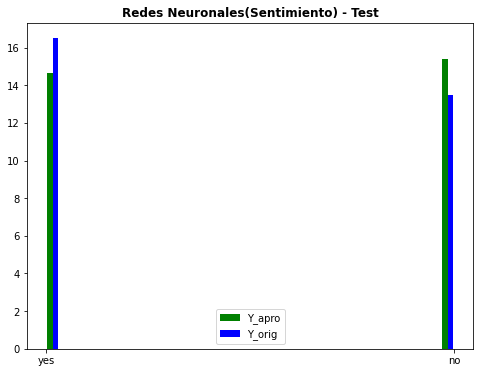

In [121]:
e_d = {'Y_apro_QDA':y_pred, 'Y_orig':y_test_sentimiento}
ed = pd.DataFrame(data=e_d)

colors = ['green', 'blue']

plt.hist(ed, 30, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('Redes Neuronales(Sentimiento) - Test',fontweight ="bold")
  
plt.show()

# Maquinas de soporte Vectorial

In [122]:
clf = SVC(kernel='linear', C=2.5)
clf.fit(X_train_sc, y_train_categoria)

SVC(C=2.5, kernel='linear')

In [123]:
y_pred_hat = clf.predict(X_test_sc)
print(metrics.classification_report(y_test_categoria, y_pred_hat))

              precision    recall  f1-score   support

      coches       1.00      0.85      0.92        13
     hoteles       1.00      1.00      1.00        13
   lavadoras       1.00      1.00      1.00        11
      libros       0.58      1.00      0.74         7
     moviles       0.89      1.00      0.94         8
      musica       0.91      1.00      0.95        10
 ordenadores       0.83      1.00      0.91         5
   peliculas       1.00      0.54      0.70        13

    accuracy                           0.90        80
   macro avg       0.90      0.92      0.89        80
weighted avg       0.93      0.90      0.90        80



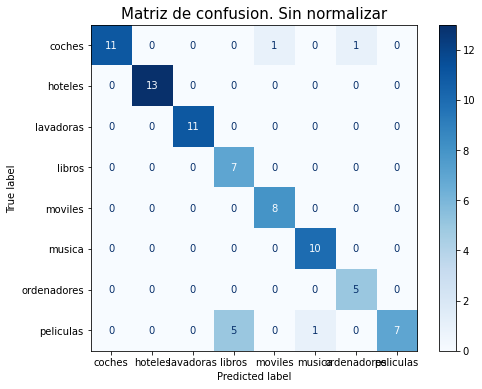

In [206]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(clf, X_test_sc, y_test_categoria, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

In [207]:
from sklearn.model_selection import GridSearchCV
# El grid de parámetros lo definimos como un diccionario
parameters = [
  {'kernel': ['rbf','linear'], 'C': [2.5, 0.01]},
]
# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator = SVC(), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(X_train_sc, y_train_categoria)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [2.5, 0.01], 'kernel': ['rbf', 'linear']}],
             return_train_score=True)

In [208]:
print('Best score:', GS.best_score_)
print('..',GS.best_estimator_.kernel)
print(',,', GS.best_estimator_.C)

Best score: 0.94375
.. linear
,, 2.5


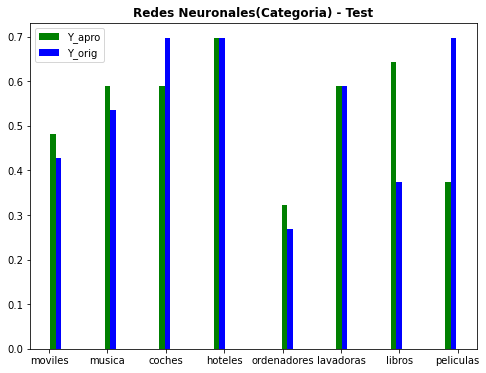

In [124]:
e_d = {'Y_apro_QDA':y_pred_hat, 'Y_orig':y_test_categoria}
ed = pd.DataFrame(data=e_d)

colors = ['green', 'blue']

plt.hist(ed, 30, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('Redes Neuronales(Categoria) - Test',fontweight ="bold")
  
plt.show()

#### Sentimiento

In [209]:
parameters = [
  {'kernel': ['rbf','linear'], 'C': [2.5, 0.01]},
]
# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator = SVC(), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(X_train_sc, y_train_sentimiento)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [2.5, 0.01], 'kernel': ['rbf', 'linear']}],
             return_train_score=True)

In [210]:
print('Best score:', GS.best_score_)
print('..',GS.best_estimator_.kernel)
print(',,', GS.best_estimator_.C)

Best score: 0.671875
.. rbf
,, 2.5


In [125]:
clf = SVC(kernel='rbf', C=2.5)
clf.fit(X_train_sc, y_train_sentimiento)

SVC(C=2.5)

In [126]:
y_pred_hat = clf.predict(X_test_sc)
print(metrics.classification_report(y_test_sentimiento, y_pred_hat))

              precision    recall  f1-score   support

          no       0.62      0.78      0.69        36
         yes       0.77      0.61      0.68        44

    accuracy                           0.69        80
   macro avg       0.70      0.70      0.69        80
weighted avg       0.70      0.69      0.69        80



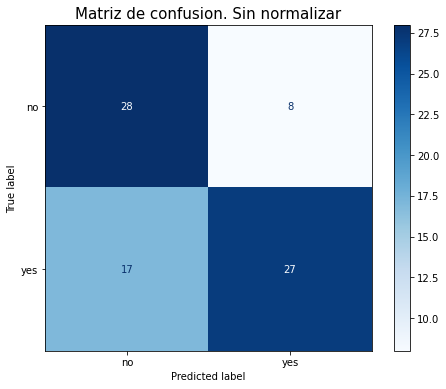

In [127]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(clf, X_test_sc, y_test_sentimiento, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

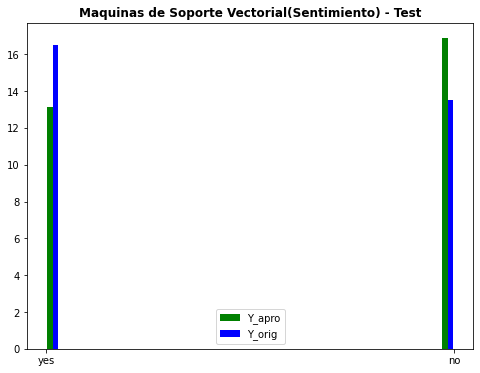

In [128]:
e_d = {'Y_apro_QDA':y_pred_hat, 'Y_orig':y_test_sentimiento}
ed = pd.DataFrame(data=e_d)

colors = ['green', 'blue']

plt.hist(ed, 30, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('Maquinas de Soporte Vectorial(Sentimiento) - Test',fontweight ="bold")
  
plt.show()

### Arboles de clasificación

In [138]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train_sc, y_train_categoria)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [139]:
alpha_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00001) #0.001
alpha_tree.fit(X_train_sc, y_train_categoria)
print("Accuracy on training set: {:.3f}".format(alpha_tree.score(X_train_sc, y_train_categoria)))
print("Accuracy on test set: {:.3f}".format(alpha_tree.score(X_test_sc, y_test_categoria)))

Accuracy on training set: 1.000
Accuracy on test set: 0.825


In [140]:
y_pred_hat2 = alpha_tree.predict(X_test_sc)
print(metrics.classification_report(y_test_categoria, y_pred_hat2))

              precision    recall  f1-score   support

      coches       0.92      0.85      0.88        13
     hoteles       1.00      0.85      0.92        13
   lavadoras       0.83      0.91      0.87        11
      libros       0.58      1.00      0.74         7
     moviles       0.62      1.00      0.76         8
      musica       0.90      0.90      0.90        10
 ordenadores       1.00      0.60      0.75         5
   peliculas       1.00      0.54      0.70        13

    accuracy                           0.82        80
   macro avg       0.86      0.83      0.81        80
weighted avg       0.88      0.82      0.83        80



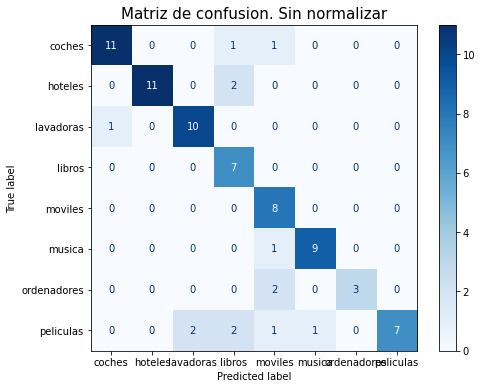

In [141]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(alpha_tree, X_test_sc, y_test_categoria, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

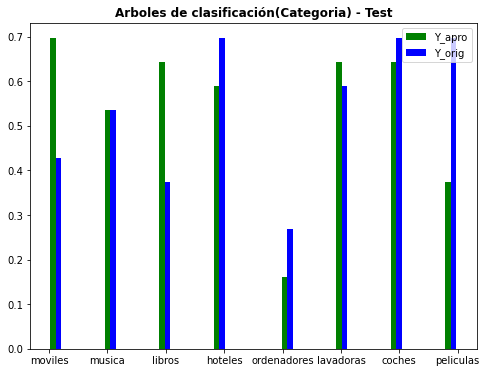

In [142]:
e_d = {'Y_apro_QDA':y_pred_hat2, 'Y_orig':y_test_categoria}
ed = pd.DataFrame(data=e_d)

colors = ['green', 'blue']

plt.hist(ed, 30, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('Arboles de clasificación(Categoria) - Test',fontweight ="bold")
  
plt.show()

In [146]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train_sc, y_train_sentimiento)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
alpha_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00001) #0.001
alpha_tree.fit(X_train_sc, y_train_sentimiento)
print("Accuracy on training set: {:.3f}".format(alpha_tree.score(X_train_sc, y_train_sentimiento)))
print("Accuracy on test set: {:.3f}".format(alpha_tree.score(X_test_sc, y_test_sentimiento)))

Accuracy on training set: 0.997
Accuracy on test set: 0.562


In [144]:
y_pred_hat2 = alpha_tree.predict(X_test_sc)
print(metrics.classification_report(y_test_sentimiento, y_pred_hat2))

              precision    recall  f1-score   support

          no       0.51      0.50      0.51        36
         yes       0.60      0.61      0.61        44

    accuracy                           0.56        80
   macro avg       0.56      0.56      0.56        80
weighted avg       0.56      0.56      0.56        80



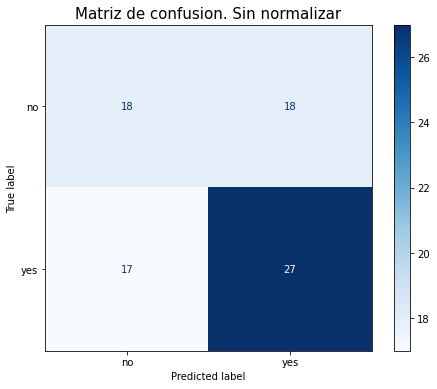

In [145]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(alpha_tree, X_test_sc, y_test_sentimiento, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

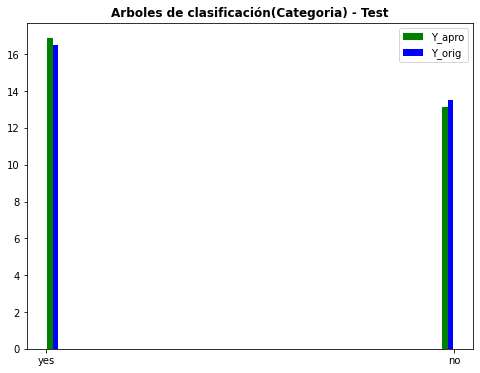

In [147]:
e_d = {'Y_apro_QDA':y_pred_hat2, 'Y_orig':y_test_sentimiento}
ed = pd.DataFrame(data=e_d)

colors = ['green', 'blue']

plt.hist(ed, 30, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('Arboles de clasificación(Categoria) - Test',fontweight ="bold")
  
plt.show()

### AdaBoost

In [148]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.1, random_state=42)
ada_clf.fit(X_train_sc, y_train_categoria)

y_hat = ada_clf.predict(X_test_sc)
metrics.confusion_matrix(y_test_categoria, y_hat)

array([[12,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  4,  0],
       [ 0,  0,  0,  1,  0,  4,  1,  7]], dtype=int64)

In [149]:
print(metrics.classification_report(y_test_categoria, y_hat))

              precision    recall  f1-score   support

      coches       1.00      0.92      0.96        13
     hoteles       1.00      1.00      1.00        13
   lavadoras       1.00      0.91      0.95        11
      libros       0.88      1.00      0.93         7
     moviles       0.88      0.88      0.88         8
      musica       0.62      1.00      0.77        10
 ordenadores       0.67      0.80      0.73         5
   peliculas       1.00      0.54      0.70        13

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.86        80
weighted avg       0.91      0.88      0.87        80



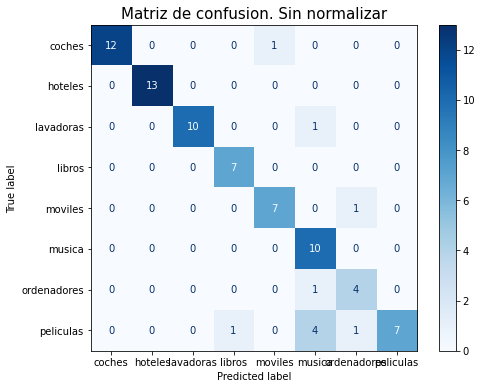

In [150]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(ada_clf, X_test_sc, y_test_categoria, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

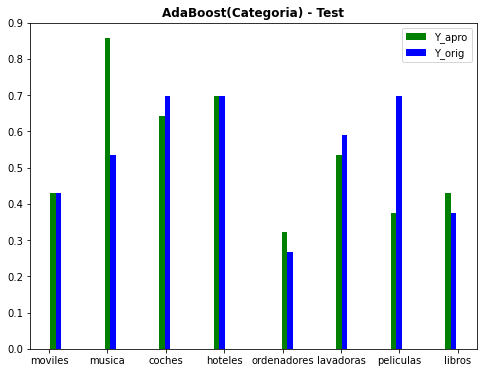

In [152]:
e_d = {'Y_apro_QDA':y_hat, 'Y_orig':y_test_categoria}
ed = pd.DataFrame(data=e_d)

colors = ['green', 'blue']

plt.hist(ed, 30, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('AdaBoost(Categoria) - Test',fontweight ="bold")
  
plt.show()

#### Sentimiento

In [153]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.1, random_state=42)
ada_clf.fit(X_train_sc, y_train_sentimiento)

y_hat = ada_clf.predict(X_test_sc)
metrics.confusion_matrix(y_test_sentimiento, y_hat)

print(metrics.classification_report(y_test_sentimiento, y_hat))

              precision    recall  f1-score   support

          no       0.60      0.69      0.64        36
         yes       0.71      0.61      0.66        44

    accuracy                           0.65        80
   macro avg       0.65      0.65      0.65        80
weighted avg       0.66      0.65      0.65        80



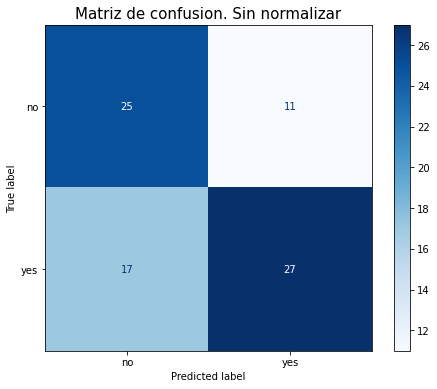

In [154]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(ada_clf, X_test_sc, y_test_sentimiento, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

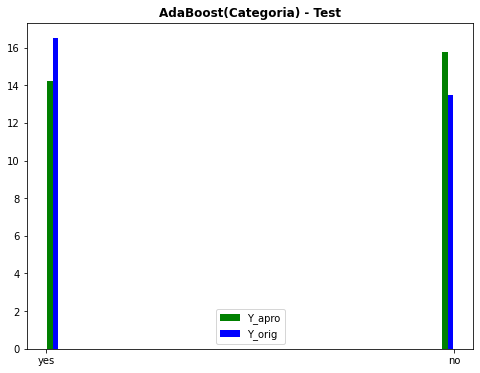

In [155]:
e_d = {'Y_apro_QDA':y_hat, 'Y_orig':y_test_sentimiento}
ed = pd.DataFrame(data=e_d)

colors = ['green', 'blue']

plt.hist(ed, 30, density = True, 
         histtype ='bar',
         color = colors,
         label = ('Y_apro','Y_orig'))
  
plt.legend(prop ={'size': 10})
  
plt.title('AdaBoost(Categoria) - Test',fontweight ="bold")
  
plt.show()